# Purpose
* The purpose of this notebook is to conduct exploratory data analysis for Case Study #1 for the APUS course ANLY499
#### Brandon Johnson

In [191]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from stargazer.stargazer import Stargazer

In [2]:
%load_ext watermark
%watermark

Last updated: 2023-05-10T13:00:17.878485-07:00

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 154 Stepping 3, GenuineIntel
CPU cores   : 20
Architecture: 64bit



In [125]:
%watermark --iversion

seaborn    : 0.12.2
pandas     : 1.5.3
statsmodels: 0.13.5
numpy      : 1.23.5
matplotlib : 3.7.0



# Data

In [195]:
df = pd.read_csv('ANLY499_Case_Study _1.csv')
df = df.rename(columns={'Private Attorney':'PrivateAttorney','Marital Status':'MaritalStatus'})
df_2 = pd.get_dummies(data=df,drop_first=True,columns=['PrivateAttorney','MaritalStatus','Specialty','Insurance','Gender'])
df.head()

,Amount,Severity,Age,PrivateAttorney,MaritalStatus,Specialty,Insurance,Gender
0,426500,6,37,1,2,Pediatrics,Private,Female
1,64000,4,66,1,2,Plastic Surgeon,Medicare/Medicaid,Female
2,17604,7,69,1,2,Internal Medicine,Private,Male
3,1986,3,56,0,2,Urological Surgery,Private,Female
4,41500,5,42,1,2,General Surgery,Unknown,Male


In [196]:
df_2.head()

,Amount,Severity,Age,PrivateAttorney_1,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,Specialty_Cardiology,Specialty_Dermatology,Specialty_Emergency Medicine,Specialty_Family Practice,Specialty_General Surgery,Specialty_Internal Medicine,Specialty_Neurology/Neurosurgery,Specialty_OBGYN,Specialty_Occupational Medicine,Specialty_Ophthamology,Specialty_Orthopedic Surgery,Specialty_Pathology,Specialty_Pediatrics,Specialty_Physical Medicine,Specialty_Plastic Surgeon,Specialty_Radiology,Specialty_Resident,Specialty_Thoracic Surgery,Specialty_Urological Surgery,Insurance_No Insurance,Insurance_Private,Insurance_Unknown,Insurance_Workers Compensation,Gender_Male
0,426500,6,37,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,64000,4,66,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,17604,7,69,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1986,3,56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,41500,5,42,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Amount           118 non-null    int64 
 1   Severity         118 non-null    int64 
 2   Age              118 non-null    int64 
 3   PrivateAttorney  118 non-null    int64 
 4   MaritalStatus    118 non-null    int64 
 5   Specialty        118 non-null    object
 6   Insurance        118 non-null    object
 7   Gender           118 non-null    object
dtypes: int64(5), object(3)
memory usage: 7.5+ KB


# 1. Calculate the mean, median and mode for the variable amount.

In [41]:
mean = df.Amount.mean()
median = df.Amount.median()
mode = df['Amount'].mode()

pd.DataFrame({'mean':mean,'median':median,'mode':mode}).round(2)

,mean,median,mode
0,91044.92,22750.0,21500


# 2. Are there outliers in the data for the variable?

In [28]:
q1 = df.Amount.quantile(q=.25)
q3 = df.Amount.quantile(q=.75)
irq = q3-q1
fence = irq*1.5
ul = q3+fence
ll = q1-fence
print(f'1.5*IRQ+Q3 Upper Limit: {ul}')
print(f'1.5*IRQ-Q1 Lower Limit: {ll}. Lower Limit is impractical since it is a negative number')

1.5*IRQ+Q3 Upper Limit: 214187.5
1.5*IRQ-Q1 Lower Limit: -116312.5. Lower Limit is impractical since it is a negative number


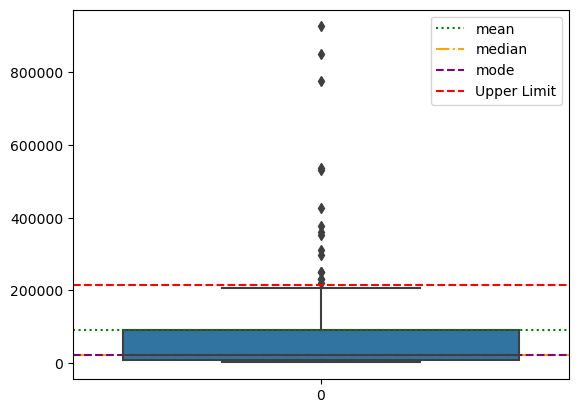

In [54]:
sns.boxplot(df.Amount,)
plt.axhline(mean,ls=':',label='mean',c='green')
plt.axhline(median,ls='-.',label='median',c='orange')
plt.axhline(mode[0],ls='--',label='mode',c='purple')
plt.axhline(ul,ls='--',label='Upper Limit',c='red')
plt.legend()
plt.show()

In [175]:
df.query(f'Amount > {ul}').sort_values(by='Amount')

,Amount,Severity,Age,PrivateAttorney,MaritalStatus,Specialty,Insurance,Gender
49,221500,7,50,1,2,Family Practice,Private,Male
35,231500,7,43,1,0,Orthopedic Surgery,Private,Male
36,231500,7,43,1,0,Neurology/Neurosurgery,Private,Male
47,251500,7,43,1,1,OBGYN,Private,Female
109,251500,5,56,1,2,Family Practice,No Insurance,Female
30,296542,9,42,1,2,Family Practice,Private,Male
19,311500,3,28,1,2,General Surgery,Private,Female
83,351500,9,59,0,2,Internal Medicine,Unknown,Male
56,361500,5,23,1,2,Family Practice,Private,Female
18,376500,7,0,1,1,OBGYN,Private,Female


# 3. What is the best measure of central tendency that you will use to describe the claim amounts?
* The median and mode are better measures of central tendency becuase they are less affected by the skewed distribution

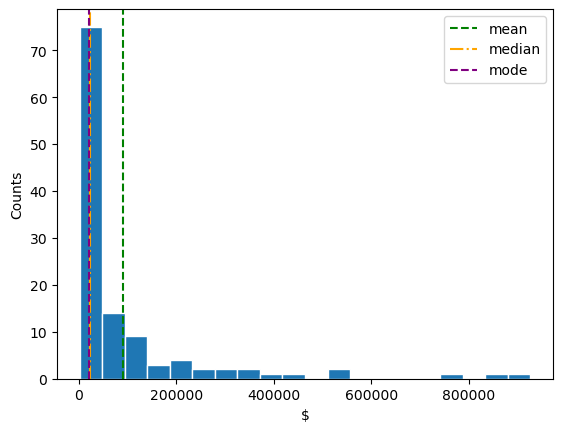

In [188]:
plt.hist(df.Amount,edgecolor='w',bins=20)
plt.axvline(mean,ls='--',c='green',label='mean')
plt.axvline(median,ls='-.',c='orange',label='median')
plt.axvline(mode[0],ls='--',c='purple',label='mode')
plt.ylabel('Counts')
plt.xlabel('$')
plt.legend()

# 4. Create distributions for the variables severity, age, marital status, insurance and gender and comment them.
* Severity: Level 3 seems the most common and level 1 & 2 are jointly uncommon.
* Marital Status: Status 2 us the most common. Status 0 & 3 are not common.
* Insurance: Private insuranceis the most common with unkown insurance being the next common.  Workers Compensation is the least common.
* Gender: Females expereince more medical malpractice in context to lawsuits.
* Age: Age is approximately normally distributed with a mean of 42.8.
# 5. Present the data for the variables listed above using appropriate charts. Justify your choice for each variable.
* Severity, marital status, insurance, and gender are displayed via count bar charts because they are either nominal or ordinal (severity)
* Age is displayed via a histogram because age is a continious variable.

Severity


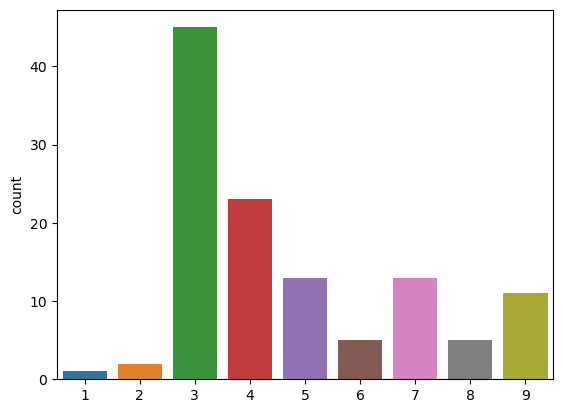


MaritalStatus


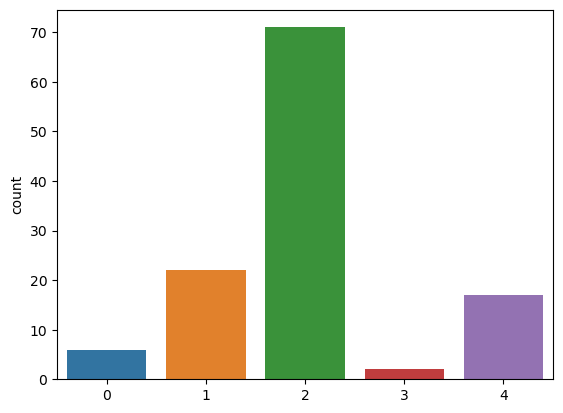


Insurance


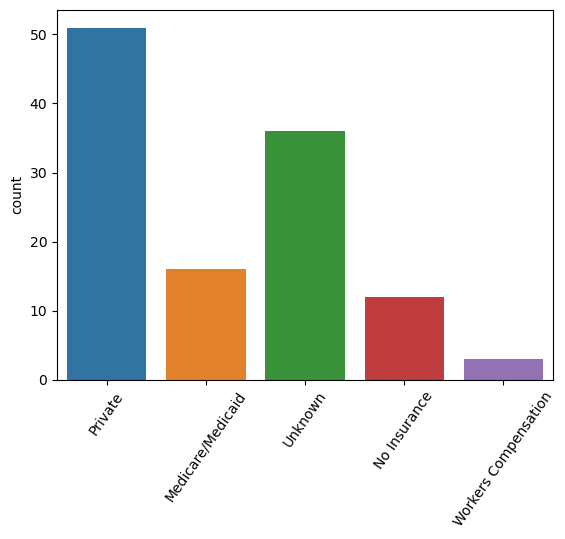


Gender


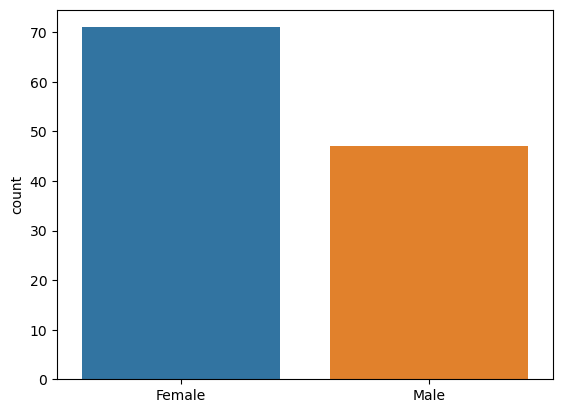


Age


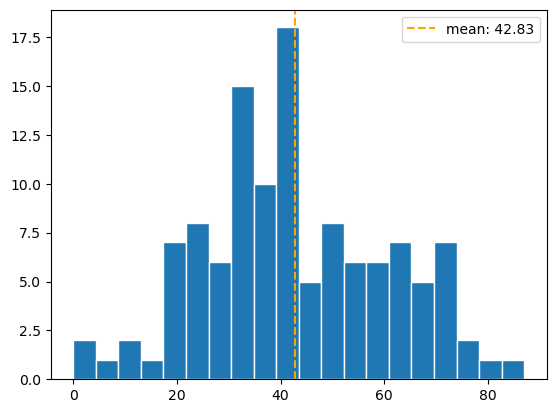

In [199]:
cols = 'Severity,MaritalStatus,Insurance,Gender'.split(',')
for i in cols:
    print(f'{i}')
    sns.countplot(x=df[i])
    plt.xlabel('')
    if i == 'Insurance':
        plt.xticks(rotation=55)
    plt.show()
    print()
print('Age')
plt.hist(df.Age,edgecolor='w',bins=20)
plt.axvline(df.Age.mean(),ls='--',c='orange',label=f'mean: {df.Age.mean():.2f}')
plt.legend()
plt.show()

# 6. Identify the specialty that had the highest claim payments.
* The box plot below shows that dermatology has the highest value for a claims payment.
* Sorting the values of the claims payment amount shows that dermatology had the highest payment of $926,500.00.

<Axes: xlabel='Amount', ylabel='Specialty'>

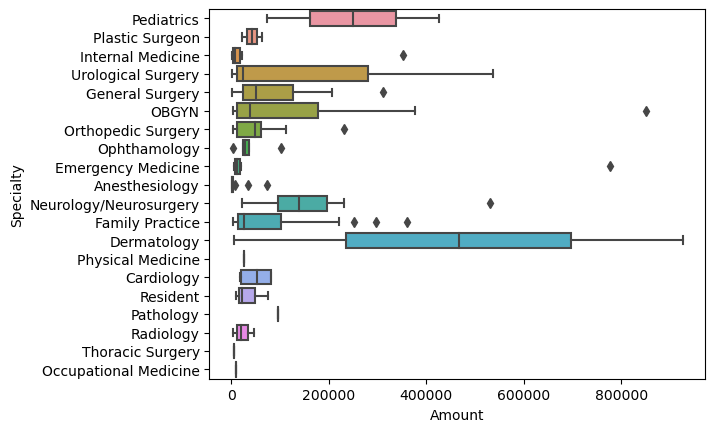

In [98]:
sns.boxplot(x=df.Amount,y=df.Specialty,)

In [100]:
df.sort_values(by='Amount',ascending=False).head(1)

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
20,926500,8,34,1,2,Dermatology,Private,Male


# 7. Do you see any relationship between gender and the claim payments?
* At the extreme, males tended to have higher claim amounts but they are but a few instances.
* The distributions of payment amount based on gender is similar.  We will also see in a regression analysis that gender is not a significant variable to include.

<Axes: xlabel='Amount', ylabel='Gender'>

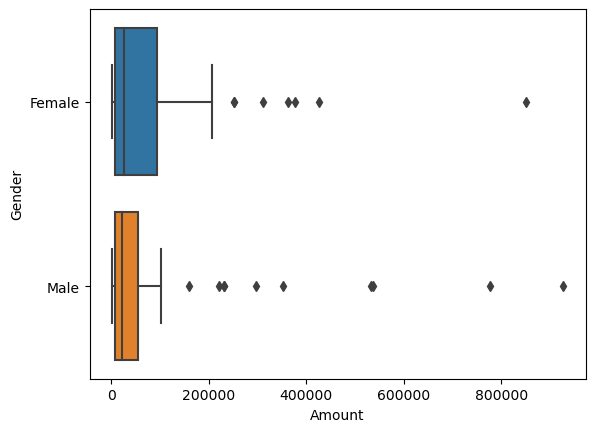

In [101]:
sns.boxplot(x=df.Amount,y=df.Gender,)

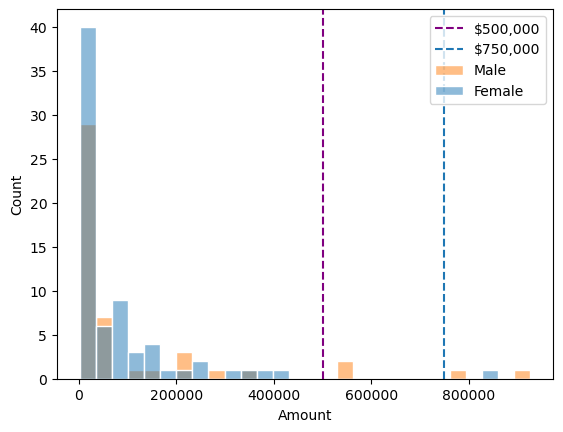

In [119]:
fig, ax = plt.subplots(1,1)
sns.histplot(data=df,x='Amount',hue='Gender',edgecolor='w',ax=ax)
ax.axvline(500000,ls='--',c='purple',label='$500,000')
ax.axvline(750000,ls='--',label='$750,000')
ax.legend(['$500,000','$750,000','Male','Female'])

In [200]:
df.query('Amount > 500000').sort_values('Amount',ascending=False)

,Amount,Severity,Age,PrivateAttorney,MaritalStatus,Specialty,Insurance,Gender
20,926500,8,34,1,2,Dermatology,Private,Male
46,851500,7,43,1,1,OBGYN,Private,Female
55,776500,8,42,1,0,Emergency Medicine,Unknown,Male
33,536500,6,35,1,2,Urological Surgery,Private,Male
29,531710,4,48,1,4,Neurology/Neurosurgery,Private,Male


In [121]:
df.query('Amount > 750000')

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
20,926500,8,34,1,2,Dermatology,Private,Male
46,851500,7,43,1,1,OBGYN,Private,Female
55,776500,8,42,1,0,Emergency Medicine,Unknown,Male


# 8. Does hiring a private attorney impact the claim payments?
* Based off the distribution below, claims with a private attorney were more likely to have a higher payment amount.
* Later in the regression analysis section, we will see that having a private attorney, on average, had higher payment amount.

<Axes: xlabel='Amount', ylabel='Count'>

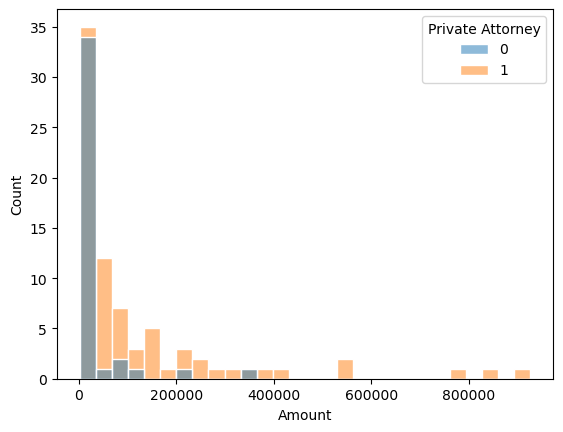

In [123]:
sns.histplot(data=df,x='Amount',hue='PrivateAttorney',edgecolor='w')

## Regression to learn about Private Attorney impact on claims payment
* The dependent variable, $y$, will be log(Amount).
* Model 1 will be the comprehensive model with all other variables as regressors
* * Model 1 intercept: Insurance Medicare/Medicaid, Gender Female, Private Attorney 0, Marital Status 0, Specialty Anesthesiology
* * Material Status does not have joint significance in model 1
* * Gender is not significant
* * Age in not significant
* Model 2 dropped Martial Status, Gender, and Age 
* * Insurance is not jointly significant in Model 2
* Model 3 with only Severity, Private Attorney, and Specialty as regressors has the largest Adjusted $R^2$, largest $F$ statistic, and smallest Residual Std. Error.
---
* Based on Model 3 and having a private attorney, **on average with all other factors constant**, increased claims payment amount by ~ 93.1%.  The exact increase is 153.6% which uses the correction method.  

In [201]:
fm = 'np.log(Amount) ~ Severity + Age + PrivateAttorney + C(MaritalStatus) + C(Specialty) + C(Insurance) + C(Gender)'
model1 = sm.ols(formula=fm, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Amount)   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     3.642
Date:                Thu, 11 May 2023   Prob (F-statistic):           1.20e-06
Time:                        11:06:57   Log-Likelihood:                -176.57
No. Observations:                 118   AIC:                             417.1
Df Residuals:                      86   BIC:                             505.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  7.2203      0.874      8.259      0.000       5.482       8.958
C(MaritalStatus)[T.1]                     -0.5080      0.643     -0.790      0.432      -1.786       0.770
C(MaritalStatus)[T.2]                     -1.0177      0.627     -1.624      0.108      -2.263       0.228
C(MaritalStatus)[T.3]                     -2.9515      1.215     -2.430      0.017      -5.366      -0.537
C(MaritalStatus)[T.4]                     -0.8879      0.687     -1.293      0.199      -2.253       0.477
C(Specialty)[T.Cardiology]                 0.3466      0.835      0.415      0.679      -1.313       2.006
C(Specialty)[T.Dermatology]                2.2620      1.023      2.212      0.030       0.229       4.295
C(Specialty)[T.Emergency Medicine]         0.3995      0.691      0.578      0.565      -0.975       1.774
C(Specialty)[T.Family Practice]            0.8823      0.572      1.542      0.127      -0.255       2.020
C(Specialty)[T.General Surgery]            1.1517      0.563      2.044      0.044       0.032       2.272
C(Specialty)[T.Internal Medicine]         -0.0329      0.621     -0.053      0.958      -1.268       1.202
C(Specialty)[T.Neurology/Neurosurgery]     1.4788      0.742      1.992      0.050       0.003       2.954
C(Specialty)[T.OBGYN]                      1.6524      0.591      2.796      0.006       0.478       2.827
C(Specialty)[T.Occupational Medicine]      1.0136      1.355      0.748      0.456      -1.679       3.707
C(Specialty)[T.Ophthamology]               1.2604      0.724      1.740      0.085      -0.179       2.700
C(Specialty)[T.Orthopedic Surgery]         0.7491      0.625      1.198      0.234      -0.494       1.992
C(Specialty)[T.Pathology]                  2.0618      1.425      1.447      0.152      -0.771       4.895
C(Specialty)[T.Pediatrics]                 2.4203      1.058      2.288      0.025       0.317       4.523
C(Specialty)[T.Physical Medicine]          1.3487      1.375      0.981      0.330      -1.385       4.083
C(Specialty)[T.Plastic Surgeon]            1.6490      0.992      1.662      0.100      -0.323       3.621
C(Specialty)[T.Radiology]                  1.0241      0.833      1.230      0.222      -0.631       2.679
C(Specialty)[T.Resident]                   1.3305      0.879      1.513      0.134      -0.418       3.079
C(Specialty)[T.Thoracic Surgery]          -0.9368      1.419     -0.660      0.511      -3.758       1.885
C(Specialty)[T.Urological Surgery]         1.4572      0.865      1.684      0.096      -0.263       3.178
C(Insurance)[T.No Insurance]               0.3934      0.560      0.702      0.484      -0.720       1.507
C(Insurance)[T.Private]                    0.3186      0.428      0.744      0.459     

In [202]:
null = 'C(MaritalStatus)[T.1] = 0, C(MaritalStatus)[T.2] = 0, C(MaritalStatus)[T.3] = 0, C(MaritalStatus)[T.4] = 0'
model1.f_test(null)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.6121395796483777, p=0.1785334164253387, df_denom=86, df_num=4>

In [209]:
fm2 = 'np.log(Amount) ~ Severity + PrivateAttorney + C(Specialty) + C(Insurance)'
model2 = sm.ols(formula=fm2, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Amount)   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     4.208
Date:                Thu, 11 May 2023   Prob (F-statistic):           2.21e-07
Time:                        11:08:04   Log-Likelihood:                -181.07
No. Observations:                 118   AIC:                             414.1
Df Residuals:                      92   BIC:                             486.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  7.1416      0.523     13.645      0.000       6.102       8.181
C(Specialty)[T.Cardiology]                 0.3369      0.827      0.407      0.685      -1.305       1.979
C(Specialty)[T.Dermatology]                1.9757      0.988      2.000      0.048       0.014       3.937
C(Specialty)[T.Emergency Medicine]         0.6309      0.627      1.006      0.317      -0.615       1.877
C(Specialty)[T.Family Practice]            0.9531      0.558      1.708      0.091      -0.155       2.061
C(Specialty)[T.General Surgery]            1.1032      0.554      1.990      0.050       0.002       2.204
C(Specialty)[T.Internal Medicine]          0.0434      0.614      0.071      0.944      -1.176       1.263
C(Specialty)[T.Neurology/Neurosurgery]     1.8822      0.711      2.647      0.010       0.470       3.295
C(Specialty)[T.OBGYN]                      1.6748      0.557      3.004      0.003       0.568       2.782
C(Specialty)[T.Occupational Medicine]      0.9791      1.345      0.728      0.468      -1.692       3.650
C(Specialty)[T.Ophthamology]               1.0286      0.697      1.476      0.143      -0.356       2.413
C(Specialty)[T.Orthopedic Surgery]         1.0262      0.591      1.737      0.086      -0.147       2.200
C(Specialty)[T.Pathology]                  1.7693      1.404      1.260      0.211      -1.019       4.557
C(Specialty)[T.Pediatrics]                 2.4203      1.028      2.354      0.021       0.378       4.462
C(Specialty)[T.Physical Medicine]          1.3410      1.355      0.990      0.325      -1.350       4.032
C(Specialty)[T.Plastic Surgeon]            1.5718      0.982      1.600      0.113      -0.379       3.523
C(Specialty)[T.Radiology]                  1.0428      0.826      1.263      0.210      -0.598       2.683
C(Specialty)[T.Resident]                   1.2160      0.848      1.435      0.155      -0.467       2.899
C(Specialty)[T.Thoracic Surgery]          -0.5720      1.362     -0.420      0.676      -3.278       2.134
C(Specialty)[T.Urological Surgery]         1.4336      0.858      1.671      0.098      -0.270       3.137
C(Insurance)[T.No Insurance]              -0.0090      0.528     -0.017      0.986      -1.058       1.040
C(Insurance)[T.Private]                    0.0370      0.401      0.092      0.927      -0.759       0.833
C(Insurance)[T.Unknown]                   -0.1362      0.420     -0.324      0.747      -0.971       0.699
C(Insurance)[T.Workers Compensation]       0.2641      0.890      0.297      0.767      -1.503       2.031
Severity                                   0.3158      0.070      4.509      0.000       0.177       0.455
PrivateAttorney                            0.9099      0.334      2.727      0.008     

In [204]:
null = 'C(Insurance)[T.No Insurance] = 0, C(Insurance)[T.Private] = 0, C(Insurance)[T.Unknown] = 0, C(Insurance)[T.Workers Compensation] = 0'
model2.f_test(null)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.09672058096426618, p=0.9832678742567513, df_denom=92, df_num=4>

In [210]:
fm3 = 'np.log(Amount) ~ Severity + PrivateAttorney + C(Specialty)'
model3 = sm.ols(formula=fm3, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Amount)   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     5.186
Date:                Thu, 11 May 2023   Prob (F-statistic):           1.01e-08
Time:                        11:08:13   Log-Likelihood:                -181.31
No. Observations:                 118   AIC:                             406.6
Df Residuals:                      96   BIC:                             467.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  7.0751      0.394     17.963      0.000       6.293       7.857
C(Specialty)[T.Cardiology]                 0.4381      0.783      0.560      0.577      -1.116       1.992
C(Specialty)[T.Dermatology]                2.0114      0.963      2.088      0.039       0.099       3.924
C(Specialty)[T.Emergency Medicine]         0.6442      0.608      1.059      0.292      -0.563       1.852
C(Specialty)[T.Family Practice]            1.0096      0.522      1.932      0.056      -0.027       2.047
C(Specialty)[T.General Surgery]            1.1389      0.537      2.121      0.036       0.073       2.205
C(Specialty)[T.Internal Medicine]          0.1118      0.587      0.190      0.849      -1.053       1.277
C(Specialty)[T.Neurology/Neurosurgery]     2.0284      0.645      3.144      0.002       0.748       3.309
C(Specialty)[T.OBGYN]                      1.7703      0.510      3.473      0.001       0.758       2.782
C(Specialty)[T.Occupational Medicine]      1.0985      1.295      0.848      0.398      -1.472       3.669
C(Specialty)[T.Ophthamology]               1.0746      0.674      1.595      0.114      -0.263       2.412
C(Specialty)[T.Orthopedic Surgery]         1.1134      0.560      1.987      0.050       0.001       2.226
C(Specialty)[T.Pathology]                  1.9154      1.343      1.426      0.157      -0.751       4.582
C(Specialty)[T.Pediatrics]                 2.5293      0.984      2.572      0.012       0.577       4.482
C(Specialty)[T.Physical Medicine]          1.2662      1.322      0.958      0.340      -1.357       3.890
C(Specialty)[T.Plastic Surgeon]            1.5837      0.956      1.657      0.101      -0.314       3.481
C(Specialty)[T.Radiology]                  0.9874      0.803      1.230      0.222      -0.606       2.580
C(Specialty)[T.Resident]                   1.2413      0.814      1.524      0.131      -0.375       2.858
C(Specialty)[T.Thoracic Surgery]          -0.4683      1.320     -0.355      0.723      -3.088       2.151
C(Specialty)[T.Urological Surgery]         1.5531      0.804      1.931      0.056      -0.044       3.150
Severity                                   0.3104      0.067      4.608      0.000       0.177       0.444
PrivateAttorney                            0.9310      0.319      2.921      0.004       0.298       1.564
==============================================================================
Omnibus:                        3.026   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.838
Skew:                           0.379   Prob(JB):                        0.242
Kurtosis:                       2.963   Cond. No.                         87.5
=============

In [216]:
pvatt_coef = model3.params[21]
exact_pct_pvtatt = 100*(np.exp(pvatt_coef)-1)
exact_pct_pvtatt

153.69346019167173

In [218]:
se = model3.bse[21]

100*(np.exp(pvatt_coef - se*se/2)-1)

141.13147431675208

In [211]:
results = Stargazer([model1,model2,model3])
results.show_model_numbers(False)
results.custom_columns(['Model 1','Model 2','Model 3'],[1,1,1])
results